In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro, normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, levene


In [2]:
populacja = pd.read_pickle("populacja.pkl")
populacja = populacja.rename(columns={
    "Nazwa": "Nazwa województwa",
    "Rok": "Rok zgonu"
})
populacja.columns

Index(['Kod', 'Nazwa województwa', 'Rok zgonu', 'Ludność_ogółem',
       'mezczyzni_mlodzi', 'kobieta_mlodzi', 'mezczyzni_seniorzy',
       'kobieta_seniorzy'],
      dtype='object')

In [3]:
kolumny_num = [
  'Ludność_ogółem',
  'mezczyzni_mlodzi',
  'kobieta_mlodzi',
  'mezczyzni_seniorzy',
  'kobieta_seniorzy'
]

populacja[kolumny_num] = populacja[kolumny_num].apply(pd.to_numeric, errors="coerce").astype("Int64")
populacja.dtypes

Kod                    int64
Nazwa województwa     object
Rok zgonu              int32
Ludność_ogółem         Int64
mezczyzni_mlodzi       Int64
kobieta_mlodzi         Int64
mezczyzni_seniorzy     Int64
kobieta_seniorzy       Int64
dtype: object

In [4]:

data = pd.read_csv('zgony_miesieczne.csv')
data=data.drop(data[(data['Rok zgonu'] == 2015) | (data['Rok zgonu'] == 2025)].index)
data["Zgony razem"] = (
    data["Zgony kobiet Przedział wiekowy 0-64 lata"] +
    data["Zgony kobiet Przedział wiekowy 65 lat i więcej"] +
    data["Zgony mężczyn Przedział wiekowy 0-64 lata"] +
    data["Zgony mężczyzn Przedział wiekowy 65 lat i więcej"]
)
data_2=data
data_2

,Kod TERYT,Nazwa województwa,Rok zgonu,Miesiąc zgonu,Zgony kobiet Przedział wiekowy 0-64 lata,Zgony kobiet Przedział wiekowy 65 lat i więcej,Zgony mężczyn Przedział wiekowy 0-64 lata,Zgony mężczyzn Przedział wiekowy 65 lat i więcej,Zgony razem
48,2,DOLNOŚLĄSKIE,2024,1,196,1385,418,1197,3196
49,2,DOLNOŚLĄSKIE,2024,2,158,1275,375,1066,2874
50,2,DOLNOŚLĄSKIE,2024,3,160,1118,391,1030,2699
51,2,DOLNOŚLĄSKIE,2024,4,139,1094,353,912,2498
52,2,DOLNOŚLĄSKIE,2024,5,152,1044,407,945,2548
...,...,...,...,...,...,...,...,...,...
1771,32,ZACHODNIOPOMORSKIE,2016,8,133,480,278,468,1359
1772,32,ZACHODNIOPOMORSKIE,2016,9,109,438,265,429,1241
1773,32,ZACHODNIOPOMORSKIE,2016,10,113,538,314,492,1457
1774,32,ZACHODNIOPOMORSKIE,2016,11,117,537,275,477,1406


In [5]:
data_2 = data_2.merge(populacja, on=["Nazwa województwa", "Rok zgonu"], how="left")
data_2.columns

Index(['Kod TERYT', 'Nazwa województwa', 'Rok zgonu', 'Miesiąc zgonu',
       'Zgony kobiet Przedział wiekowy 0-64 lata',
       'Zgony kobiet Przedział wiekowy 65 lat i więcej',
       'Zgony mężczyn Przedział wiekowy 0-64 lata',
       'Zgony mężczyzn Przedział wiekowy 65 lat i więcej', 'Zgony razem',
       'Kod', 'Ludność_ogółem', 'mezczyzni_mlodzi', 'kobieta_mlodzi',
       'mezczyzni_seniorzy', 'kobieta_seniorzy'],
      dtype='object')

In [6]:
data_2["Wskaznik_zgonow_ogolem"] = (
    data_2["Zgony razem"] / data_2["Ludność_ogółem"] * 1000
)

data_2["Wskaznik_zgonow_kobiety_mlodzi"] = (
    data_2["Zgony kobiet Przedział wiekowy 0-64 lata"] / data_2["kobieta_mlodzi"] * 1000
)

data_2["Wskaznik_zgonow_kobiety_seniorzy"] = (
    data_2["Zgony kobiet Przedział wiekowy 65 lat i więcej"] / data_2["kobieta_seniorzy"] * 1000
)

data_2["Wskaznik_zgonow_mezczyzni_mlodzi"] = (
    data_2["Zgony mężczyn Przedział wiekowy 0-64 lata"] / data_2["mezczyzni_mlodzi"] * 1000
)

data_2["Wskaznik_zgonow_mezczyzni_seniorzy"] = (
    data_2["Zgony mężczyzn Przedział wiekowy 65 lat i więcej"] / data_2["mezczyzni_seniorzy"] * 1000
)

data_2

,Kod TERYT,Nazwa województwa,Rok zgonu,Miesiąc zgonu,Zgony kobiet Przedział wiekowy 0-64 lata,Zgony kobiet Przedział wiekowy 65 lat i więcej,Zgony mężczyn Przedział wiekowy 0-64 lata,Zgony mężczyzn Przedział wiekowy 65 lat i więcej,Zgony razem,Kod,Ludność_ogółem,mezczyzni_mlodzi,kobieta_mlodzi,mezczyzni_seniorzy,kobieta_seniorzy,Wskaznik_zgonow_ogolem,Wskaznik_zgonow_kobiety_mlodzi,Wskaznik_zgonow_kobiety_seniorzy,Wskaznik_zgonow_mezczyzni_mlodzi,Wskaznik_zgonow_mezczyzni_seniorzy
0,2,DOLNOŚLĄSKIE,2024,1,196,1385,418,1197,3196,200000,2868242,1129955,1120370,247896,370021,1.114271,0.174942,3.743031,0.369926,4.828638
1,2,DOLNOŚLĄSKIE,2024,2,158,1275,375,1066,2874,200000,2868242,1129955,1120370,247896,370021,1.002008,0.141025,3.44575,0.331872,4.30019
2,2,DOLNOŚLĄSKIE,2024,3,160,1118,391,1030,2699,200000,2868242,1129955,1120370,247896,370021,0.940995,0.14281,3.02145,0.346031,4.154968
3,2,DOLNOŚLĄSKIE,2024,4,139,1094,353,912,2498,200000,2868242,1129955,1120370,247896,370021,0.870917,0.124066,2.956589,0.312402,3.678962
4,2,DOLNOŚLĄSKIE,2024,5,152,1044,407,945,2548,200000,2868242,1129955,1120370,247896,370021,0.888349,0.135669,2.821461,0.360191,3.812082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,32,ZACHODNIOPOMORSKIE,2016,8,133,480,278,468,1359,3200000,1708174,720331,711041,110432,166370,0.795586,0.18705,2.885136,0.385934,4.237902
1724,32,ZACHODNIOPOMORSKIE,2016,9,109,438,265,429,1241,3200000,1708174,720331,711041,110432,166370,0.726507,0.153296,2.632686,0.367886,3.884744
1725,32,ZACHODNIOPOMORSKIE,2016,10,113,538,314,492,1457,3200000,1708174,720331,711041,110432,166370,0.852958,0.158922,3.233756,0.435911,4.45523
1726,32,ZACHODNIOPOMORSKIE,2016,11,117,537,275,477,1406,3200000,1708174,720331,711041,110432,166370,0.823101,0.164547,3.227745,0.381769,4.3194


### Iloraz zgonów z podziałem na województwa


In [7]:

df_grouped = data_2.groupby(["Rok zgonu", "Miesiąc zgonu", "Nazwa województwa"]).sum().reset_index()

df_grouped["Ratio_0_64"] = (
    df_grouped["Wskaznik_zgonow_mezczyzni_mlodzi"] /
    df_grouped["Wskaznik_zgonow_kobiety_mlodzi"]
)

df_grouped["Ratio_65plus"] = (
    df_grouped["Wskaznik_zgonow_mezczyzni_seniorzy"] /
    df_grouped["Wskaznik_zgonow_kobiety_seniorzy"]
)

df_grouped["Okres"] = df_grouped["Rok zgonu"].apply(lambda x: "Przed pandemią" if x <= 2019    else ("W trakcie pandemii" if (2020 <= x < 2022) else "Po pandemii"))

df_grouped

,Rok zgonu,Miesiąc zgonu,Nazwa województwa,Kod TERYT,Zgony kobiet Przedział wiekowy 0-64 lata,Zgony kobiet Przedział wiekowy 65 lat i więcej,Zgony mężczyn Przedział wiekowy 0-64 lata,Zgony mężczyzn Przedział wiekowy 65 lat i więcej,Zgony razem,Kod,...,mezczyzni_seniorzy,kobieta_seniorzy,Wskaznik_zgonow_ogolem,Wskaznik_zgonow_kobiety_mlodzi,Wskaznik_zgonow_kobiety_seniorzy,Wskaznik_zgonow_mezczyzni_mlodzi,Wskaznik_zgonow_mezczyzni_seniorzy,Ratio_0_64,Ratio_65plus,Okres
0,2016,1,DOLNOŚLĄSKIE,2,244,1072,533,845,2694,200000,...,190175,302503,0.927779,0.202448,3.543767,0.442036,4.443276,2.183452,1.253829,Przed pandemią
1,2016,1,KUJAWSKO-POMORSKIE,4,151,689,325,610,1775,400000,...,130539,201781,0.851757,0.173046,3.414593,0.369735,4.672933,2.136625,1.368518,Przed pandemią
2,2016,1,LUBELSKIE,6,133,861,347,686,2027,600000,...,137532,223151,0.950153,0.151749,3.858374,0.387187,4.98793,2.551501,1.292754,Przed pandemią
3,2016,1,LUBUSKIE,8,65,338,181,291,875,800000,...,61958,95618,0.860056,0.152351,3.534899,0.417866,4.69673,2.74279,1.328674,Przed pandemią
4,2016,1,MAZOWIECKIE,14,343,2117,857,1672,4989,1400000,...,346672,550419,0.92976,0.152541,3.846161,0.385995,4.823003,2.530425,1.253978,Przed pandemią
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024,12,WIELKOPOLSKIE,30,166,1369,397,1241,3173,3000000,...,273009,395422,0.911785,0.119037,3.462124,0.280163,4.545638,2.35357,1.312962,Po pandemii
1724,2024,12,ZACHODNIOPOMORSKIE,32,100,723,237,630,1690,3200000,...,147316,210470,1.041436,0.159758,3.435169,0.370876,4.276521,2.321482,1.244923,Po pandemii
1725,2024,12,ŁÓDZKIE,10,160,1178,372,1012,2722,1000000,...,209428,328764,1.16031,0.177882,3.583117,0.409575,4.83221,2.302509,1.348605,Po pandemii
1726,2024,12,ŚLĄSKIE,24,279,2000,609,1707,4595,2400000,...,379760,561219,1.070736,0.167329,3.563671,0.361835,4.494944,2.162414,1.261324,Po pandemii


### Test Shapiro-Wilk w celu sprawdzenia czy dane maja rozkład normalny w poszczególnych przedziałach wiekowych 

In [8]:
def sprawdz_normalnosc(df, kolumna, grupa):
    wyniki = []
    for woj in df["Nazwa województwa"].unique():
        for okres in df["Okres"].unique():
            data = df[(df["Nazwa województwa"]==woj) &
                      (df["Okres"]==okres)][kolumna].dropna()
            stat, p = shapiro(data)
            wyniki.append({"Województwo": woj,"Okres": okres,"Grupa": grupa, "Shapiro p": round(p, 4)})
    return pd.DataFrame(wyniki)

df_normalnosc = sprawdz_normalnosc(df_grouped, "Ratio_65plus", "Wskaznik_zgonow_mezczyzni_seniorzy")
df_normalnosc




,Województwo,Okres,Grupa,Shapiro p
0,DOLNOŚLĄSKIE,Przed pandemią,Wskaznik_zgonow_mezczyzni_seniorzy,0.3880
1,DOLNOŚLĄSKIE,W trakcie pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.2315
2,DOLNOŚLĄSKIE,Po pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.1458
3,KUJAWSKO-POMORSKIE,Przed pandemią,Wskaznik_zgonow_mezczyzni_seniorzy,0.7924
4,KUJAWSKO-POMORSKIE,W trakcie pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.6639
5,KUJAWSKO-POMORSKIE,Po pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.3809
6,LUBELSKIE,Przed pandemią,Wskaznik_zgonow_mezczyzni_seniorzy,0.3674
7,LUBELSKIE,W trakcie pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.8303
8,LUBELSKIE,Po pandemii,Wskaznik_zgonow_mezczyzni_seniorzy,0.3447
9,LUBUSKIE,Przed pandemią,Wskaznik_zgonow_mezczyzni_seniorzy,0.9590


In [9]:
df_grouped["Nazwa województwa"].unique()

array(['DOLNOŚLĄSKIE', 'KUJAWSKO-POMORSKIE', 'LUBELSKIE', 'LUBUSKIE',
       'MAZOWIECKIE', 'MAŁOPOLSKIE', 'OPOLSKIE', 'PODKARPACKIE',
       'PODLASKIE', 'POMORSKIE', 'WARMIŃSKO-MAZURSKIE', 'WIELKOPOLSKIE',
       'ZACHODNIOPOMORSKIE', 'ŁÓDZKIE', 'ŚLĄSKIE', 'ŚWIĘTOKRZYSKIE'],
      dtype=object)

### Czy średnia liczba zgonów różni się istotnie miedzy płciami?

H0: średnia liczba zgonów mężczyzn = średnia liczba zgonów kobiet w danej grupie wiekowej, województwie i okresie.

H1: średnia liczba zgonów mężczyzn != średnia liczba zgonów kobiet.

### HAC Newey-West!

In [26]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def hac_ttest(df):
    wyniki = []
    
    grupy = [
        ("Przedział wiekowy 0-64 lata", "Wskaznik_zgonow_kobiety_mlodzi", "Wskaznik_zgonow_mezczyzni_mlodzi"),
        ("Przedział wiekowy 65 lat i więcej", "Wskaznik_zgonow_kobiety_seniorzy", "Wskaznik_zgonow_mezczyzni_seniorzy")
    ]
    
    for woj in df["Nazwa województwa"].unique():
        for okres in df["Okres"].unique():
            df_sub = df[(df["Nazwa województwa"] == woj) & (df["Okres"] == okres)]
            
            for grupa, kol_kobiety, kol_mezczyzni in grupy:
                # Usuń wiersze z brakami
                df_sub_clean = df_sub.dropna(subset=[kol_kobiety, kol_mezczyzni])
                if df_sub_clean.empty:
                    continue
                
                # Różnica jako float
                y = (df_sub_clean[kol_mezczyzni].astype(float) - df_sub_clean[kol_kobiety].astype(float)).values
                X = sm.add_constant(np.ones(len(y)), has_constant='add')
                
                model = sm.OLS(y, X)
                results = model.fit(cov_type='HAC', cov_kwds={'maxlags':4})
                
                p_value = results.pvalues[0]  # p-value dla interceptu
                
                wyniki.append({
                    "Województwo": woj,
                    "Okres": okres,
                    "Grupa": grupa,
                    "P-value": p_value
                })
    
    return pd.DataFrame(wyniki)

# Wywołanie
hac_results = hac_ttest(df_grouped)
hac_results[hac_results["Województwo"]== "MAŁOPOLSKIE"]

,Województwo,Okres,Grupa,P-value
30,MAŁOPOLSKIE,Przed pandemią,Przedział wiekowy 0-64 lata,0.000000e+00
31,MAŁOPOLSKIE,Przed pandemią,Przedział wiekowy 65 lat i więcej,6.805315e-278
32,MAŁOPOLSKIE,W trakcie pandemii,Przedział wiekowy 0-64 lata,8.236212e-255
33,MAŁOPOLSKIE,W trakcie pandemii,Przedział wiekowy 65 lat i więcej,1.096040e-19
34,MAŁOPOLSKIE,Po pandemii,Przedział wiekowy 0-64 lata,5.856269e-128
35,MAŁOPOLSKIE,Po pandemii,Przedział wiekowy 65 lat i więcej,4.932896e-145


In [11]:
df_summary = (
    df_grouped.groupby(["Nazwa województwa", "Okres","Miesiąc zgonu"])[["Ratio_0_64", "Ratio_65plus"]].mean().reset_index()
)
df_summary

,Nazwa województwa,Okres,Miesiąc zgonu,Ratio_0_64,Ratio_65plus
0,DOLNOŚLĄSKIE,Po pandemii,1,2.233373,1.237126
1,DOLNOŚLĄSKIE,Po pandemii,2,2.294778,1.232413
2,DOLNOŚLĄSKIE,Po pandemii,3,2.230033,1.307543
3,DOLNOŚLĄSKIE,Po pandemii,4,2.417399,1.273404
4,DOLNOŚLĄSKIE,Po pandemii,5,2.454862,1.320893
...,...,...,...,...,...
571,ŚWIĘTOKRZYSKIE,W trakcie pandemii,8,2.759867,1.36446
572,ŚWIĘTOKRZYSKIE,W trakcie pandemii,9,3.417272,1.278171
573,ŚWIĘTOKRZYSKIE,W trakcie pandemii,10,2.287147,1.327064
574,ŚWIĘTOKRZYSKIE,W trakcie pandemii,11,2.647013,1.366245


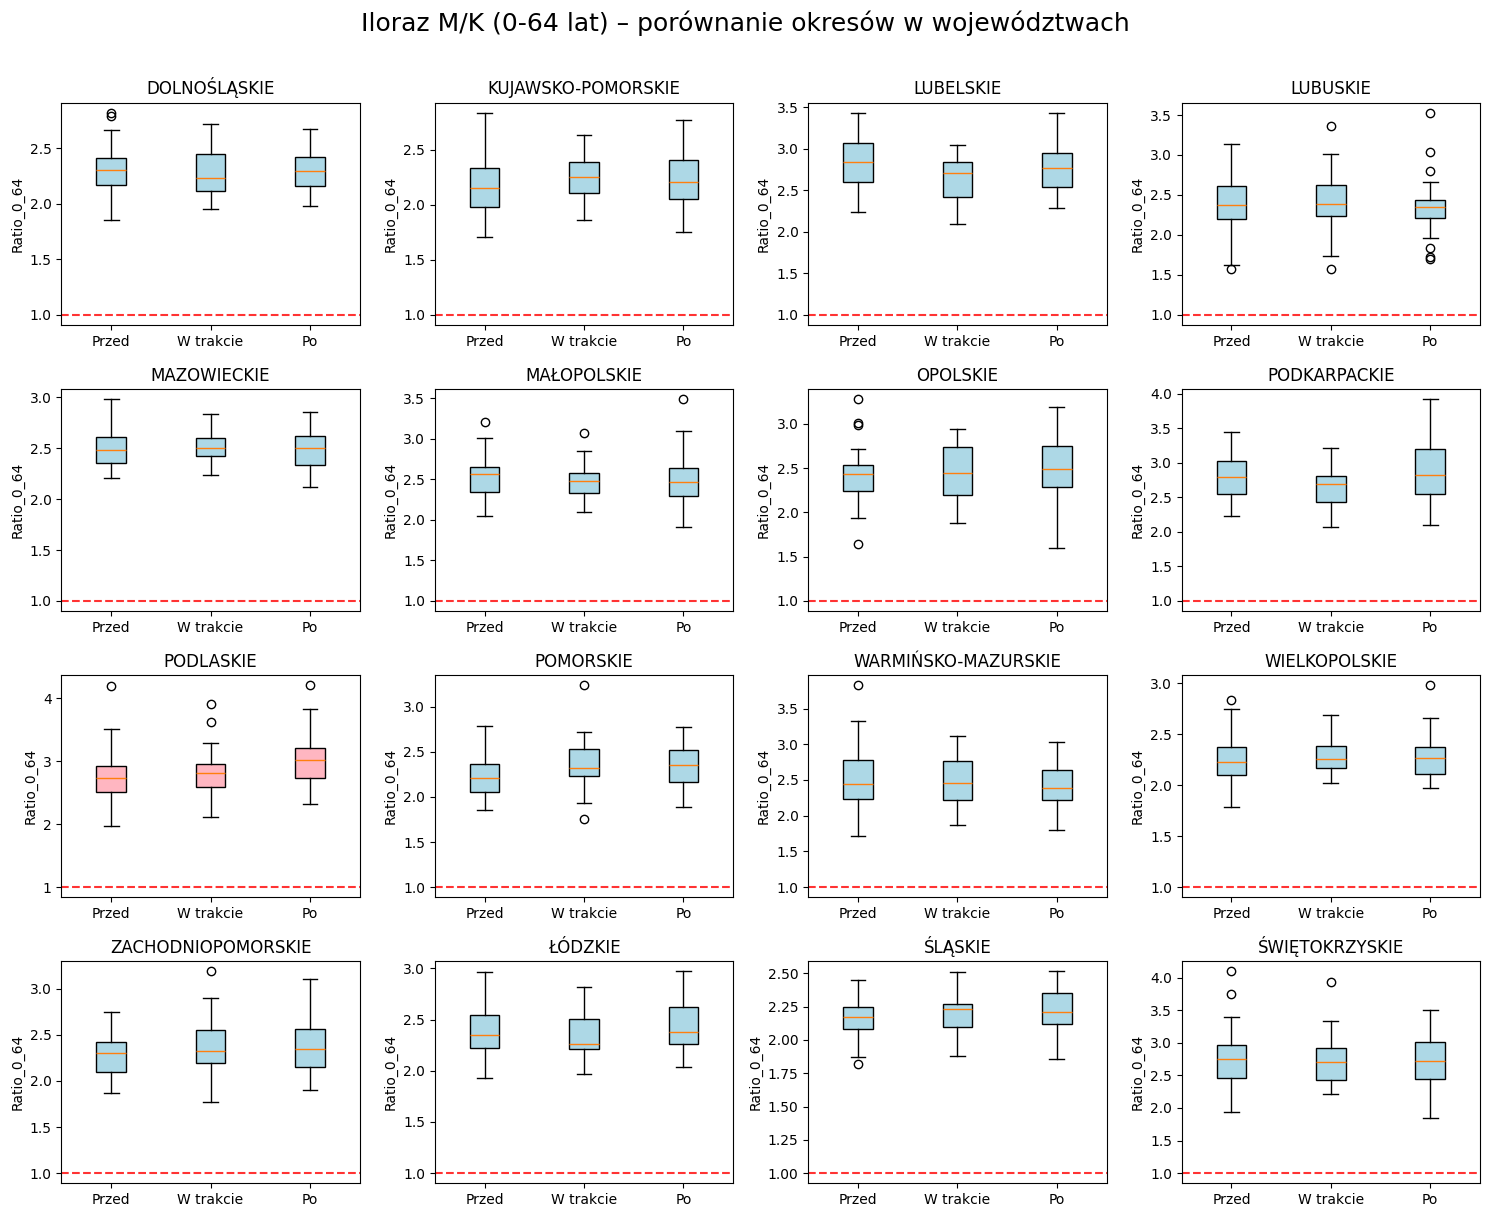

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12), sharey=False)
axes = axes.flatten()
wojewodztwa = df_summary["Nazwa województwa"].unique()
kolory_woj = {
    "PODLASKIE": ["lightpink", "lightpink", "lightpink"],
#    "POMORSKIE": ["lightpink", "lightpink", "lightpink"]
}

for i, woj in enumerate(wojewodztwa):
    df_sub = df_grouped[df_grouped["Nazwa województwa"] == woj]
    data = [df_sub[df_sub["Okres"] == okres]["Ratio_0_64"].dropna() 
            for okres in ["Przed pandemią", "W trakcie pandemii", "Po pandemii"]]
    bp = axes[i].boxplot(data, labels=["Przed", "W trakcie", "Po"], patch_artist=True)
    kolory = kolory_woj.get(woj, ["lightblue"] * 3)

    for patch, color in zip(bp['boxes'], kolory):
        patch.set_facecolor(color)

    axes[i].axhline(1, color="red", linestyle="--", alpha=0.8)
    axes[i].set_title(woj)
    axes[i].set_ylabel("Ratio_0_64")

fig.suptitle("Iloraz M/K (0-64 lat) – porównanie okresów w województwach", fontsize=18,y=1.01)
plt.tight_layout()
plt.show()

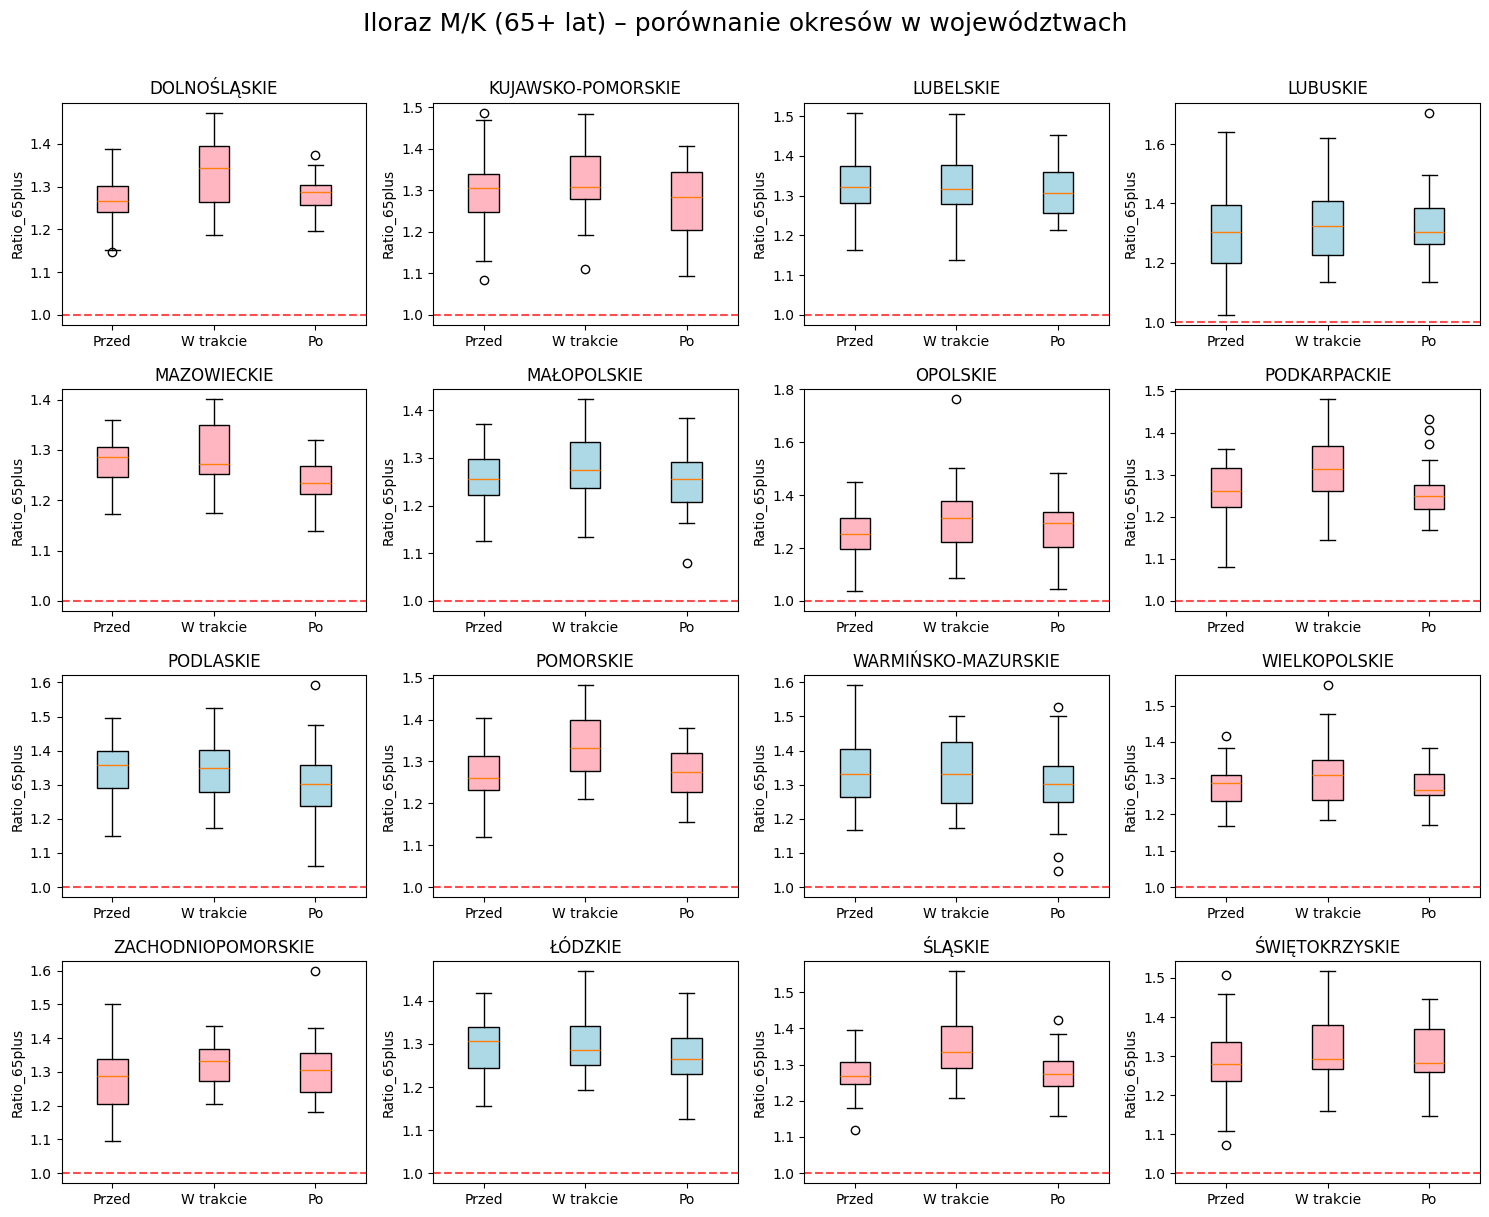

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12), sharey=False)
axes = axes.flatten()

kolory_woj = {
    'ŚWIĘTOKRZYSKIE': ["lightpink", "lightpink", "lightpink"],
    "POMORSKIE": ["lightpink", "lightpink", "lightpink"],
    "DOLNOŚLĄSKIE": ["lightpink", "lightpink", "lightpink"],
    "MAZOWIECKIE": ["lightpink", "lightpink", "lightpink"],
    "PODKARPACKIE": ["lightpink", "lightpink", "lightpink"],
    "ŚLĄSKIE": ["lightpink", "lightpink", "lightpink"],
    'KUJAWSKO-POMORSKIE': ["lightpink", "lightpink", "lightpink"],
    'OPOLSKIE': ["lightpink", "lightpink", "lightpink"],
    'WIELKOPOLSKIE': ["lightpink", "lightpink", "lightpink"],
    'ZACHODNIOPOMORSKIE': ["lightpink", "lightpink", "lightpink"],
}

for i, woj in enumerate(wojewodztwa):
    df_sub = df_grouped[df_grouped["Nazwa województwa"] == woj]
    data = [df_sub[df_sub["Okres"] == okres]["Ratio_65plus"].dropna() 
            for okres in ["Przed pandemią", "W trakcie pandemii", "Po pandemii"]]
    bp = axes[i].boxplot(data, labels=["Przed", "W trakcie", "Po"], patch_artist=True)
    kolory = kolory_woj.get(woj, ["lightblue"] * 3)

    for patch, color in zip(bp['boxes'], kolory):
        patch.set_facecolor(color)

    axes[i].axhline(1, color="red", linestyle="--", alpha=0.7)
    axes[i].set_title(woj)
    axes[i].set_ylabel("Ratio_65plus")

fig.suptitle("Iloraz M/K (65+ lat) – porównanie okresów w województwach", fontsize=18,y=1.01)
plt.tight_layout()
plt.show()


### Czy średni iloraz M/K jest taki sam we wszystkich okresach?
H0: średni iloraz M/K jest taki sam we wszystkich okresach

H1: przynajmniej w jednym okresie średnia różni się od pozostałych

In [14]:
from scipy.stats import friedmanchisquare
import pandas as pd

def test_friedman(df):
    wyniki = []
    grupy = ["Ratio_0_64", "Ratio_65plus"]

    for woj in df["Nazwa województwa"].unique():
        df_woj = df[df["Nazwa województwa"] == woj].sort_values("Miesiąc zgonu")

        for wiek in grupy:
            przed = df_woj[df_woj["Okres"] == "Przed pandemią"][wiek].dropna().values
            w_trakcie = df_woj[df_woj["Okres"] == "W trakcie pandemii"][wiek].dropna().values
            po = df_woj[df_woj["Okres"] == "Po pandemii"][wiek].dropna().values
            #taka sama liczba obserwacji
            min_len = min(len(przed), len(w_trakcie), len(po))
            if min_len >= 2:
                stat, p = friedmanchisquare(
                    przed[:min_len],
                    w_trakcie[:min_len],
                    po[:min_len]
                )

                wyniki.append({
                    "Województwo": woj,
                    "Grupa": wiek,
                    "Statystyka": round(stat, 4),
                    "P-value": round(p, 6)
                })

    return pd.DataFrame(wyniki)

resfr=test_friedman(df_grouped)
resfr[resfr["P-value"]<=0.05]

,Województwo,Grupa,Statystyka,P-value
1,DOLNOŚLĄSKIE,Ratio_65plus,8.3333,0.015504
3,KUJAWSKO-POMORSKIE,Ratio_65plus,7.5833,0.022558
9,MAZOWIECKIE,Ratio_65plus,10.7500,0.004631
13,OPOLSKIE,Ratio_65plus,10.3333,0.005704
15,PODKARPACKIE,Ratio_65plus,6.5833,0.037192
16,PODLASKIE,Ratio_0_64,6.3333,0.042144
19,POMORSKIE,Ratio_65plus,10.3333,0.005704
23,WIELKOPOLSKIE,Ratio_65plus,7.0000,0.030197
25,ZACHODNIOPOMORSKIE,Ratio_65plus,6.7500,0.034218
29,ŚLĄSKIE,Ratio_65plus,10.7500,0.004631


## Suma zgonów rocznie według województw

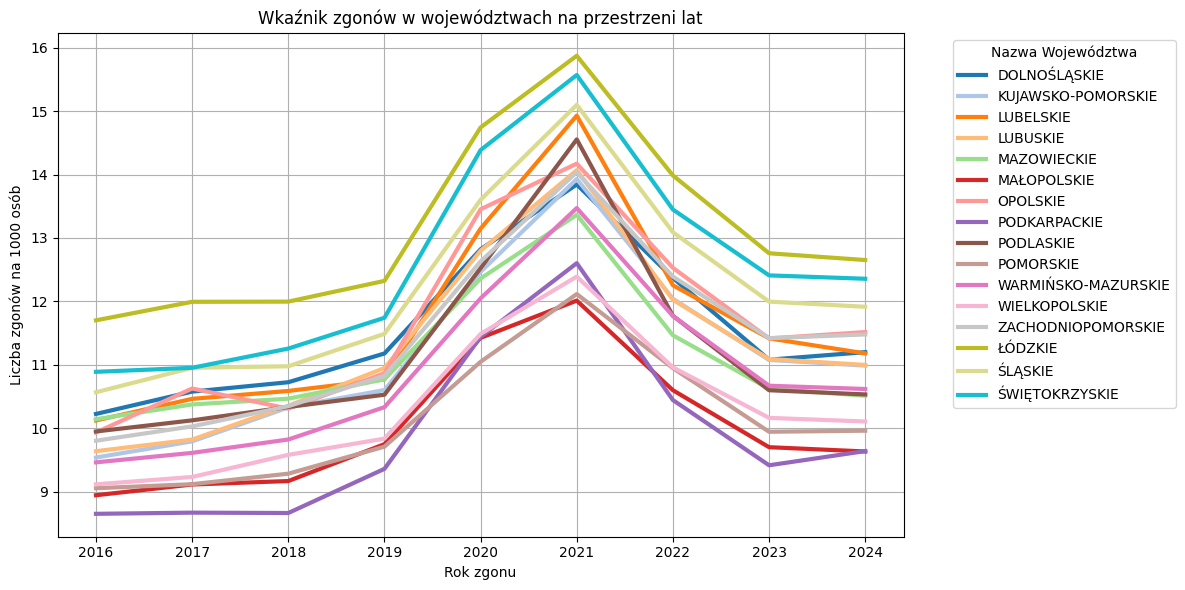

In [15]:
wojewodztwa_zgony = data_2.groupby(["Nazwa województwa", "Rok zgonu"])["Wskaznik_zgonow_ogolem"].sum().reset_index()
wojew=wojewodztwa_zgony["Nazwa województwa"].unique()
colors = plt.colormaps['tab20'] 

plt.figure(figsize=(12, 6))
for i, woj in enumerate(wojew):
    dane_woj = wojewodztwa_zgony[wojewodztwa_zgony["Nazwa województwa"] == woj]
    plt.plot(dane_woj["Rok zgonu"], dane_woj["Wskaznik_zgonow_ogolem"], label=str(woj), color=colors(i / len(wojew)), linewidth=3)
plt.title('Wkaźnik zgonów w województwach na przestrzeni lat')
plt.xlabel('Rok zgonu')
plt.ylabel('Liczba zgonów na 1000 osób')

plt.legend(title='Nazwa Województwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


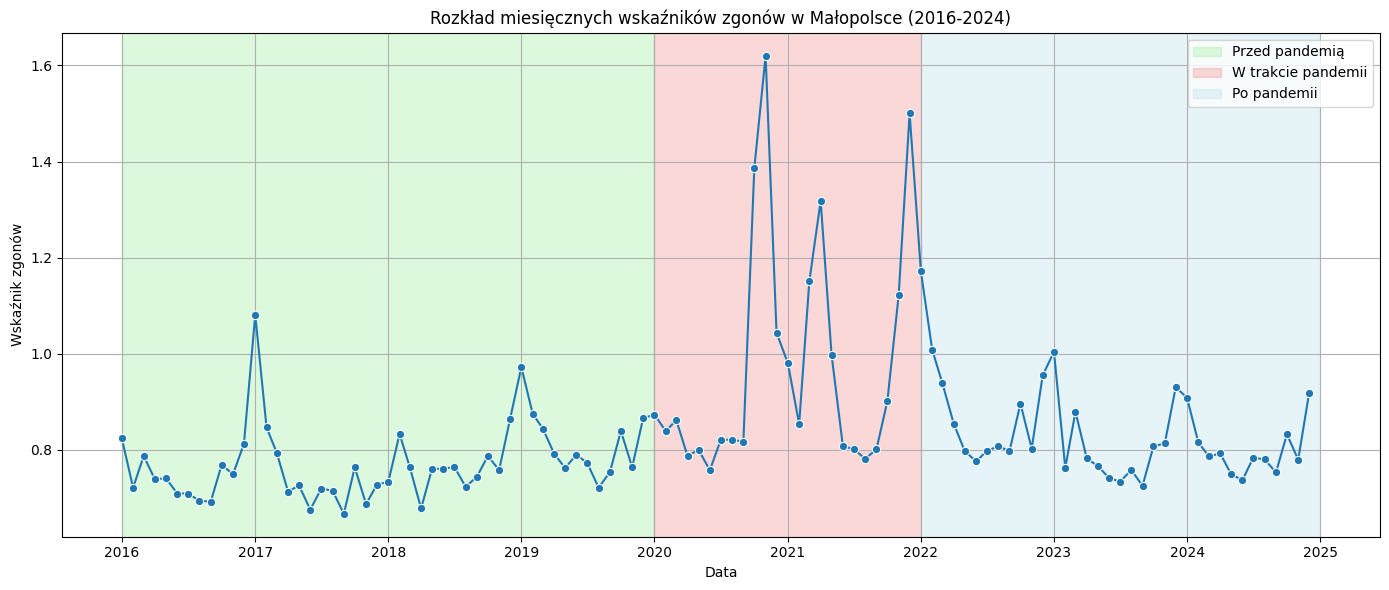

In [16]:
import seaborn as sns


miesieczne_zgony = (
    data_2[data_2["Nazwa województwa"] == "MAŁOPOLSKIE"]
    .groupby(["Rok zgonu", "Miesiąc zgonu"])["Wskaznik_zgonow_ogolem"]
    .sum()
    .reset_index()
)

miesieczne_zgony["Data"] = pd.to_datetime(
    miesieczne_zgony["Rok zgonu"].astype(str) + "-" +
    miesieczne_zgony["Miesiąc zgonu"].astype(str) + "-01"
)

plt.figure(figsize=(14,6))
plt.axvspan(pd.Timestamp("2016-01-01"), pd.Timestamp("2019-12-31"), color="lightgreen", alpha=0.3, label="Przed pandemią")
plt.axvspan(pd.Timestamp("2020-01-01"), pd.Timestamp("2021-12-31"), color="lightcoral", alpha=0.3, label="W trakcie pandemii")
plt.axvspan(pd.Timestamp("2022-01-01"), pd.Timestamp("2024-12-31"), color="lightblue", alpha=0.3, label="Po pandemii")
sns.lineplot(data=miesieczne_zgony, x="Data", y="Wskaznik_zgonow_ogolem", marker="o")
plt.title("Rozkład miesięcznych wskaźników zgonów w Małopolsce (2016-2024)")
plt.xlabel("Data")
plt.ylabel("Wskaźnik zgonów")
plt.grid(True)
plt.tight_layout()
plt.show()

### Funkcje autokorelacji i autokorelacji cząstkowej

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości

Funkcja autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Funkcja autokorelacji cząstkowej (PACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy

<Figure size 1000x400 with 0 Axes>

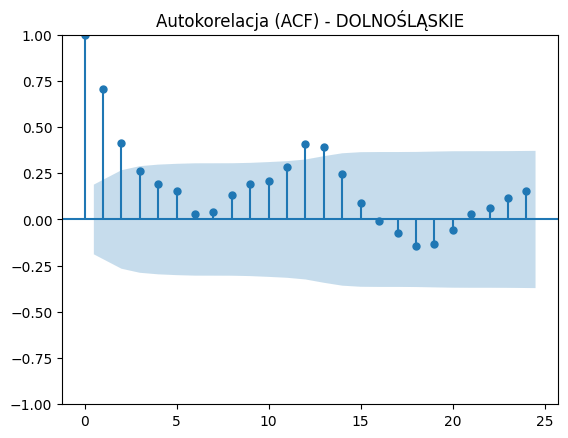

<Figure size 1000x400 with 0 Axes>

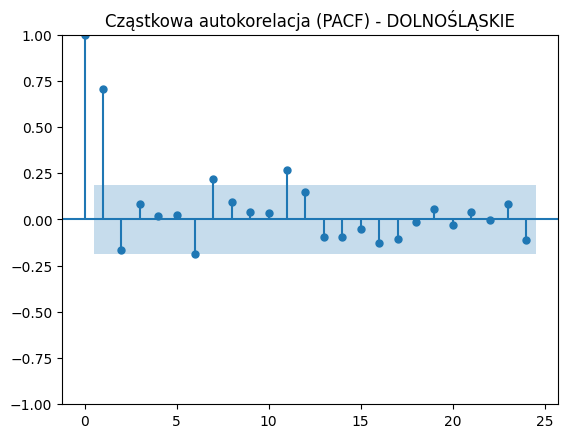

<Figure size 1000x400 with 0 Axes>

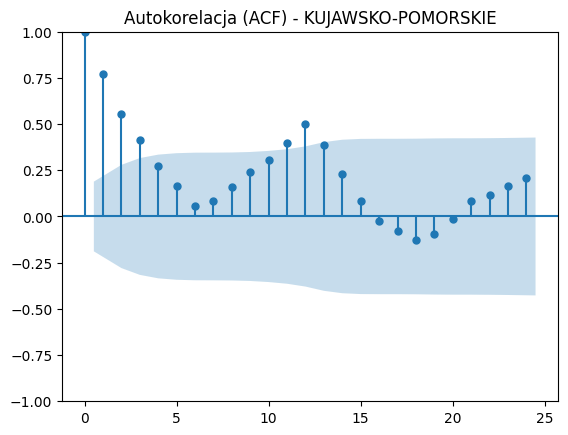

<Figure size 1000x400 with 0 Axes>

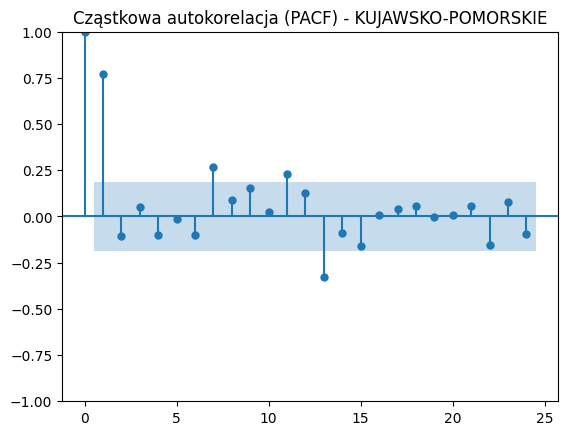

<Figure size 1000x400 with 0 Axes>

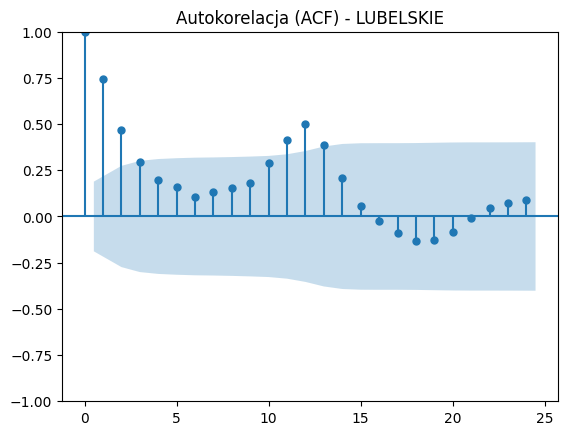

<Figure size 1000x400 with 0 Axes>

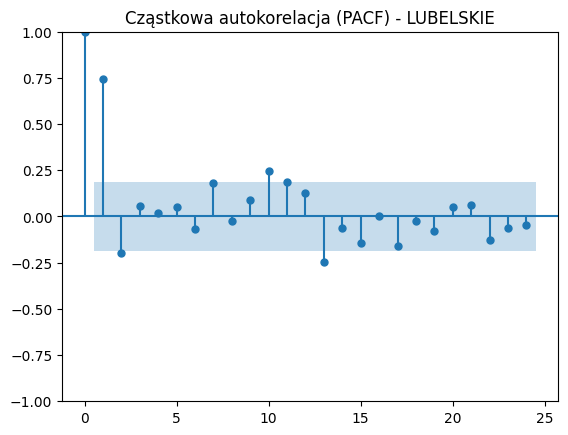

<Figure size 1000x400 with 0 Axes>

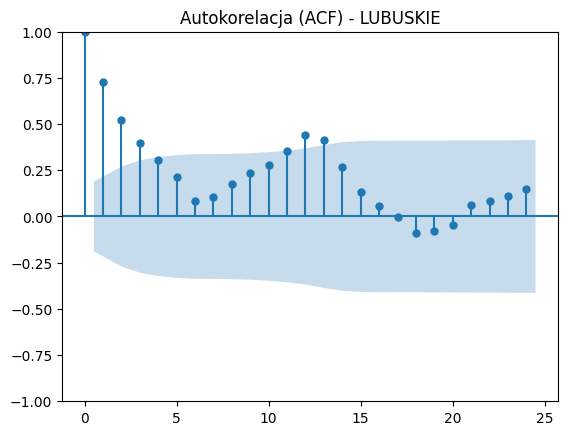

<Figure size 1000x400 with 0 Axes>

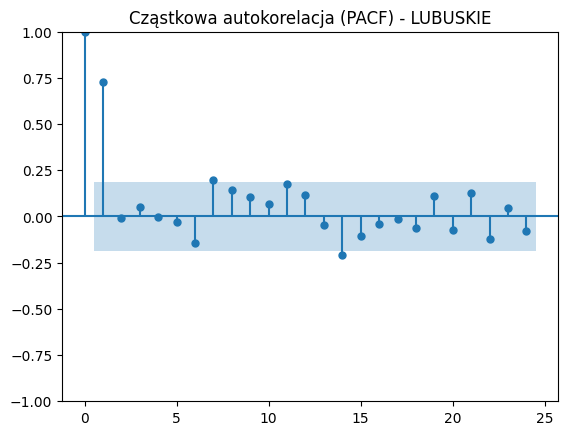

<Figure size 1000x400 with 0 Axes>

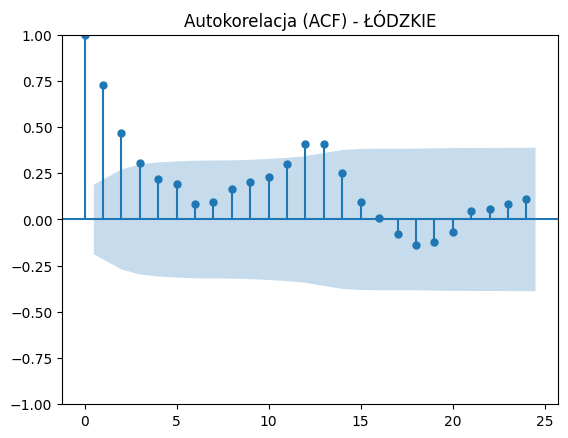

<Figure size 1000x400 with 0 Axes>

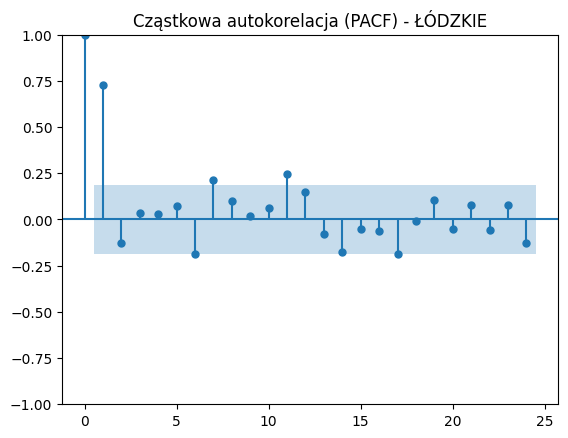

<Figure size 1000x400 with 0 Axes>

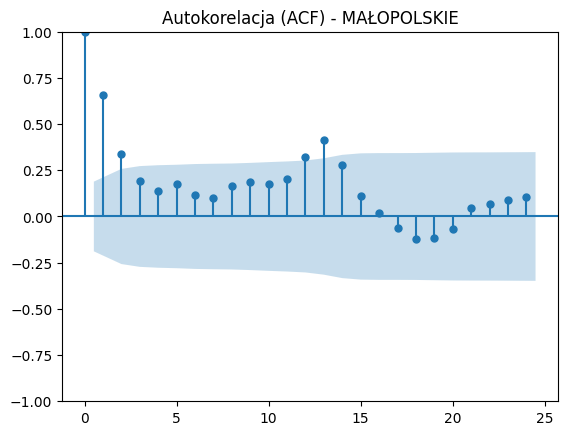

<Figure size 1000x400 with 0 Axes>

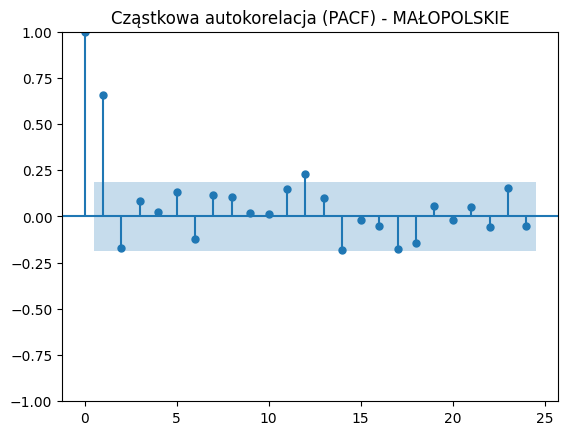

<Figure size 1000x400 with 0 Axes>

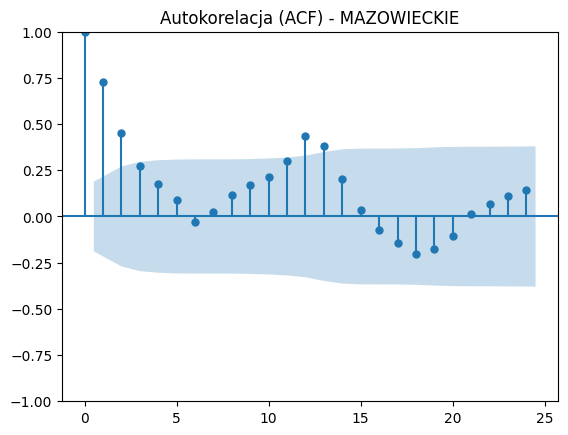

<Figure size 1000x400 with 0 Axes>

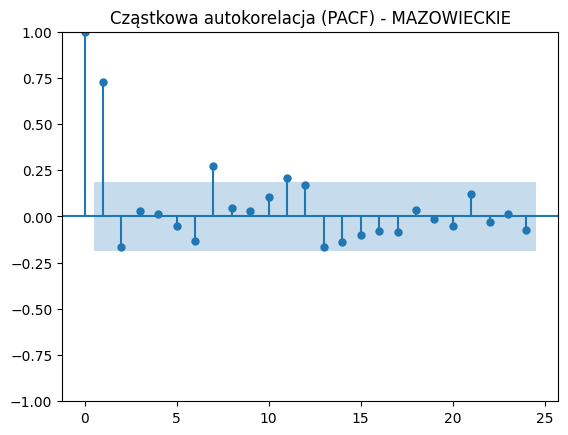

<Figure size 1000x400 with 0 Axes>

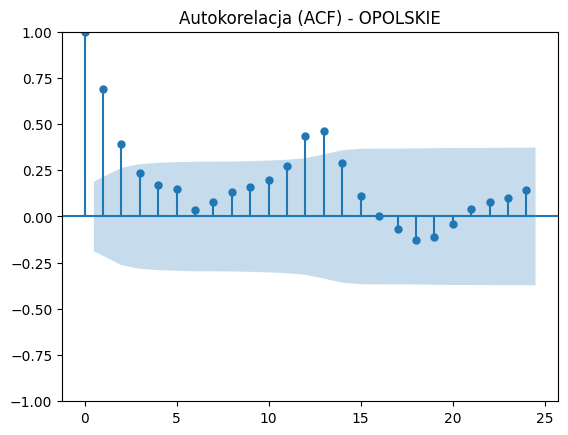

<Figure size 1000x400 with 0 Axes>

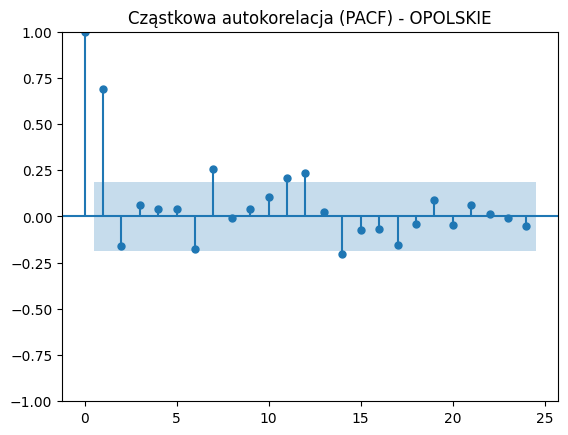

<Figure size 1000x400 with 0 Axes>

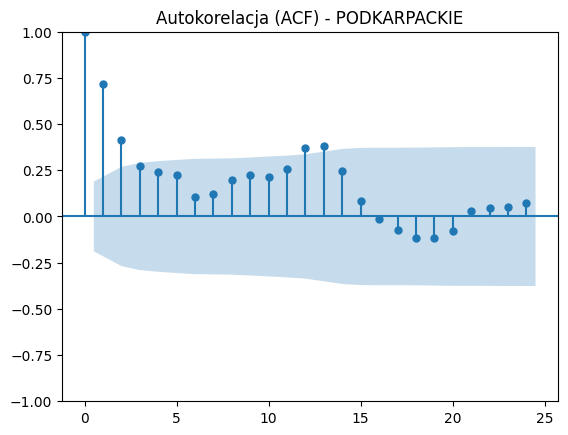

<Figure size 1000x400 with 0 Axes>

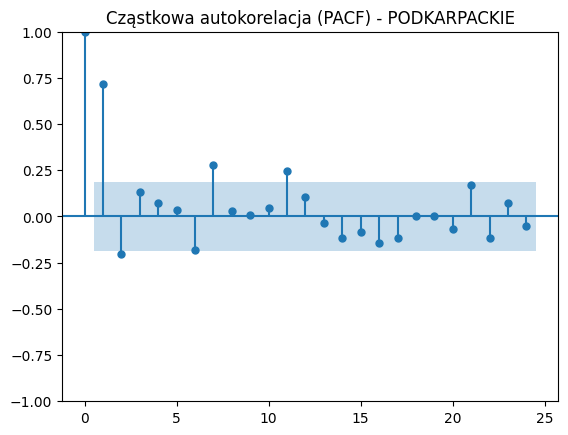

<Figure size 1000x400 with 0 Axes>

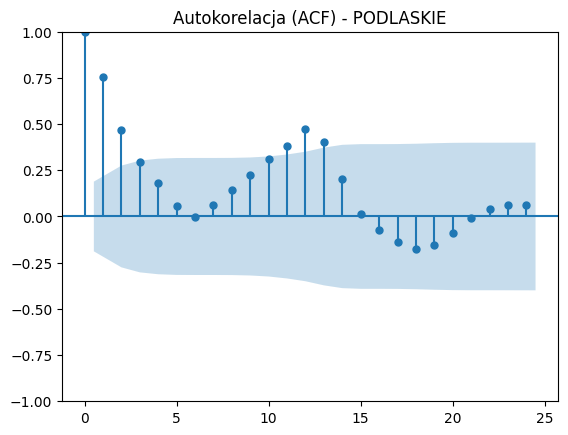

<Figure size 1000x400 with 0 Axes>

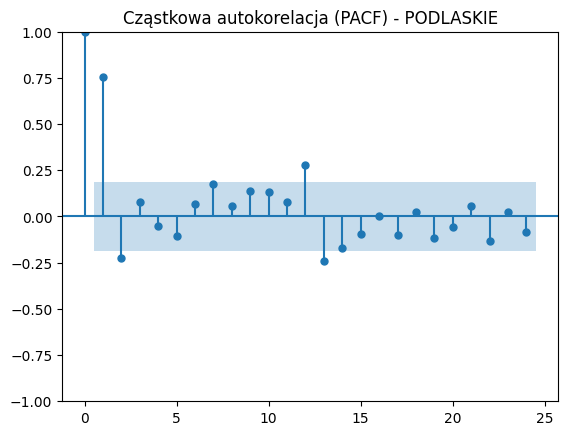

<Figure size 1000x400 with 0 Axes>

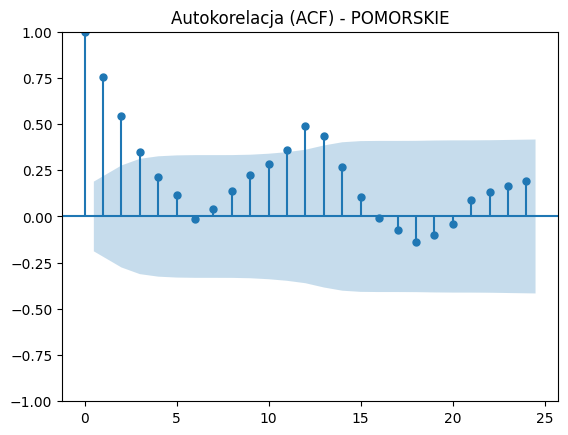

<Figure size 1000x400 with 0 Axes>

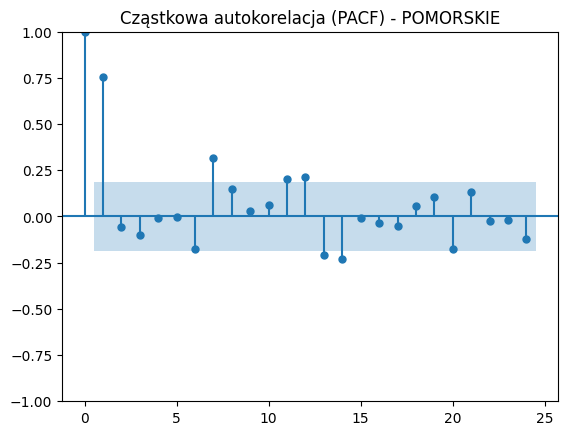

<Figure size 1000x400 with 0 Axes>

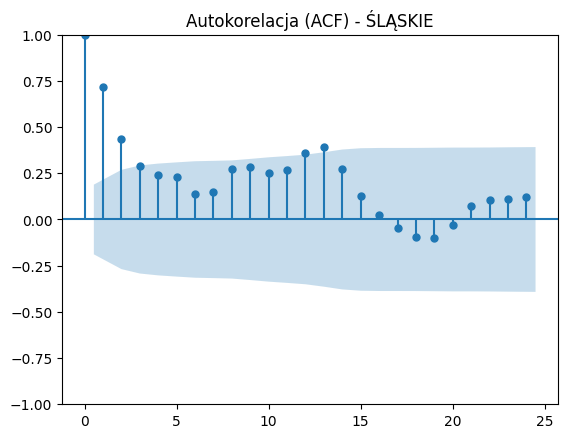

<Figure size 1000x400 with 0 Axes>

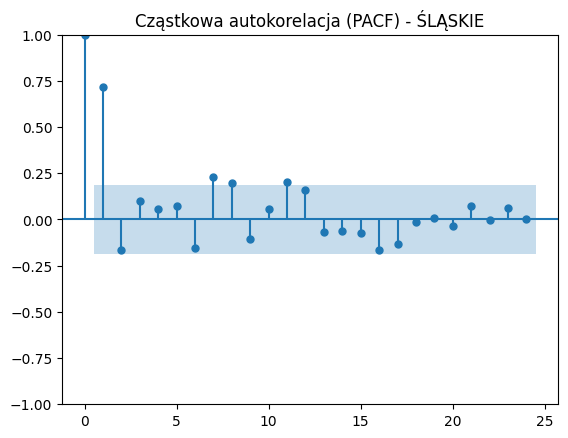

<Figure size 1000x400 with 0 Axes>

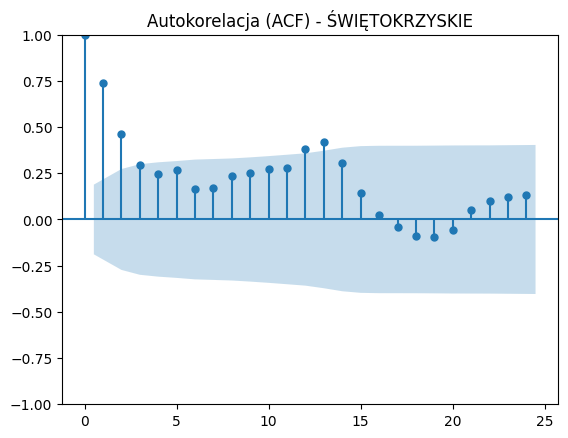

<Figure size 1000x400 with 0 Axes>

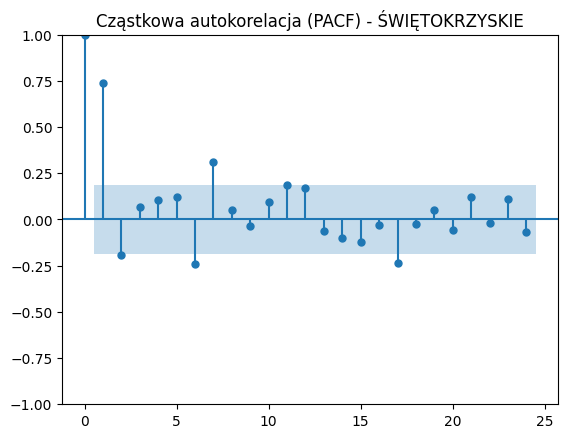

<Figure size 1000x400 with 0 Axes>

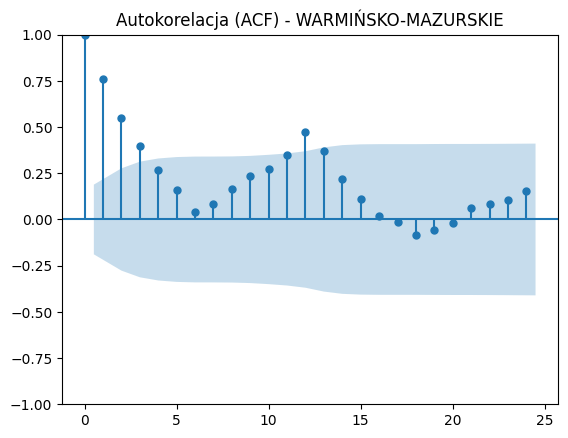

<Figure size 1000x400 with 0 Axes>

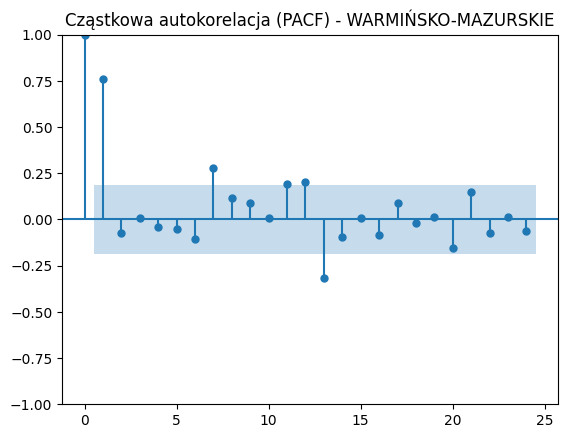

<Figure size 1000x400 with 0 Axes>

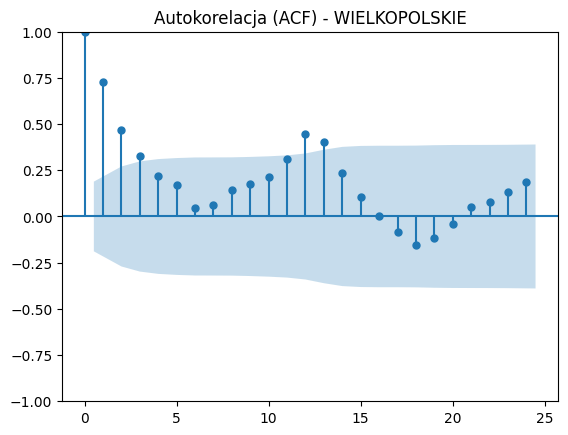

<Figure size 1000x400 with 0 Axes>

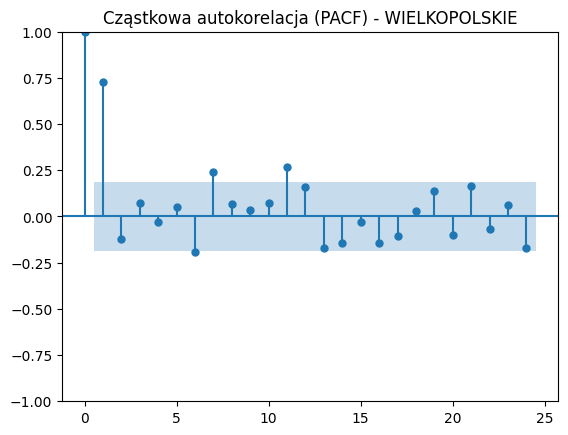

<Figure size 1000x400 with 0 Axes>

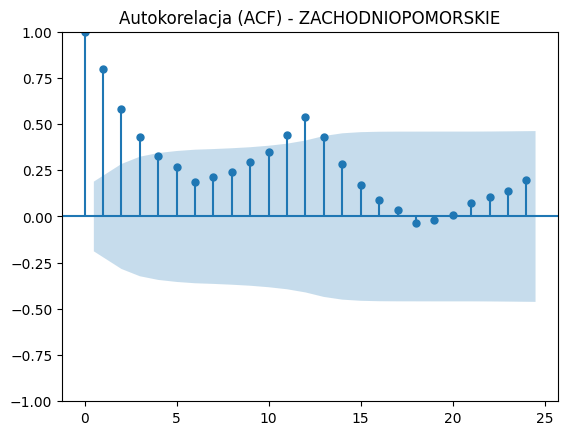

<Figure size 1000x400 with 0 Axes>

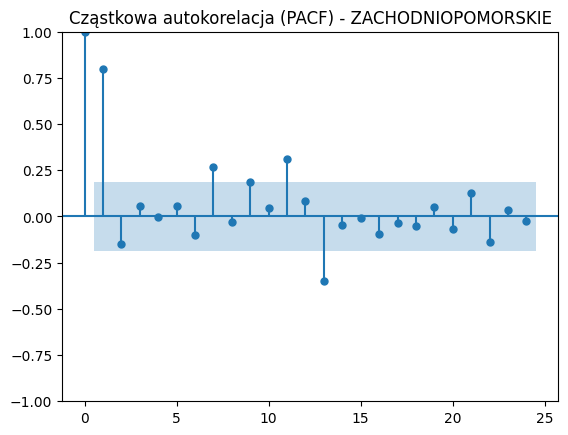

In [20]:
woj_list = data_2["Nazwa województwa"].unique()

for woj in woj_list:
    #Dane rzeczywiste
    data = data_2[data_2["Nazwa województwa"] == woj].sort_values(["Rok zgonu", "Miesiąc zgonu"])["Wskaznik_zgonow_ogolem"].values
    
    #ACF
    plt.figure(figsize=(10,4))
    plot_acf(data, lags=24)
    plt.title(f"Autokorelacja (ACF) - {woj}")
    plt.show()
    #PACF
    plt.figure(figsize=(10,4))
    plot_pacf(data, lags=24, method='ywm')
    plt.title(f"Cząstkowa autokorelacja (PACF) - {woj}")
    plt.show()

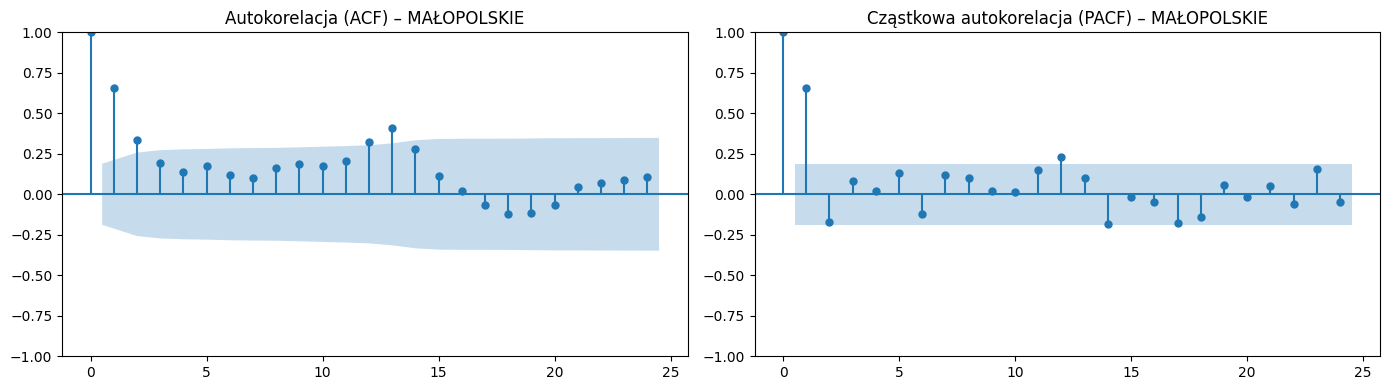

In [21]:
data = (
    data_2[data_2["Nazwa województwa"] == "MAŁOPOLSKIE"]
    .sort_values(["Rok zgonu", "Miesiąc zgonu"])["Wskaznik_zgonow_ogolem"]
    .values
)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(data, lags=24, ax=axes[0])
axes[0].set_title("Autokorelacja (ACF) – MAŁOPOLSKIE")
# PACF
plot_pacf(data, lags=24, method="ywm", ax=axes[1])
axes[1].set_title("Cząstkowa autokorelacja (PACF) – MAŁOPOLSKIE")

plt.tight_layout()
plt.show()

In [22]:
data_2.to_pickle('data_2.pkl')